# Detector geometry in a voxel grid

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tqdm.notebook import tqdm

import sys
sys.path.append('/Users/glucia/Projects/DeepLearning/TrackingML')
from core.geometry import DetectorModule, VoxelGrid
from core.data_handler import BinaryHandler

In [2]:
detector_file = '../../data/detectors.csv'
voxel_grid = VoxelGrid(detector_file, 1000, 1000, 4000, 4)


Creating submodule dataset...
Calculating normalized positions...
Calculating bounding box...


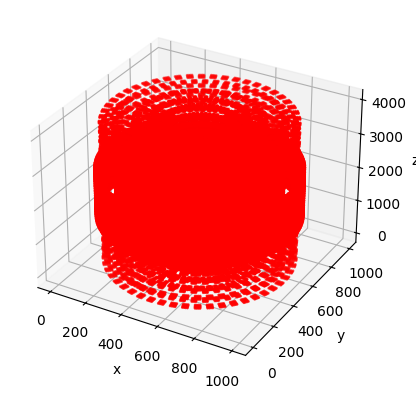

In [3]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for _, isubmodule in voxel_grid.submodule_dataset.iterrows():
    voxel_grid.add_hit_to_grid(isubmodule['cx'], isubmodule['cy'], isubmodule['cz'])

voxel_grid.show(ax)

In [4]:
duplicates = voxel_grid.submodule_dataset.duplicated(subset=['grid_x', 'grid_y', 'grid_z'])

if duplicates.any():
    print('Warning: Some submodules are associated with the same voxel grid point.')
else:
    print('Each submodule is uniquely associated with one voxel grid point.')

In [5]:
# check how many entries of the voxel grid are higher than 0, 1, 2, 3
print('Number of voxels with 0 hits: ', np.sum(voxel_grid.voxel_grid == 0))
print('Number of voxels with 1 hit: ', np.sum(voxel_grid.voxel_grid == 1))
print('Number of voxels with 2 hits: ', np.sum(voxel_grid.voxel_grid == 2))
print('Number of voxels with 3 hits: ', np.sum(voxel_grid.voxel_grid == 3))


Number of voxels with 0 hits:  3999869010
Number of voxels with 1 hit:  74752
Number of voxels with 2 hits:  448
Number of voxels with 3 hits:  0


Let's try to load an event

In [9]:
data_dir = '../../data/train_1'
events = ['000001001']

event_bh = BinaryHandler(data_dir, events, 'test', detector_file)

DATASET_X_IDX = 0
DATASET_Y_IDX = 1
DATASET_Z_IDX = 2

grid_positions = np.zeros((event_bh.dataset.shape[0], 3), dtype=int)
for idx, (x, y, z) in enumerate(zip(event_bh.dataset[DATASET_X_IDX], event_bh.dataset[DATASET_Y_IDX], event_bh.dataset[DATASET_Z_IDX])):
    grid_positions[idx] = voxel_grid.get_voxel_position(x, y, z)

voxel_grid.reset_grid()

Building test dataset...
Processing event 000001001


  0%|          | 0/93680 [00:00<?, ?it/s]

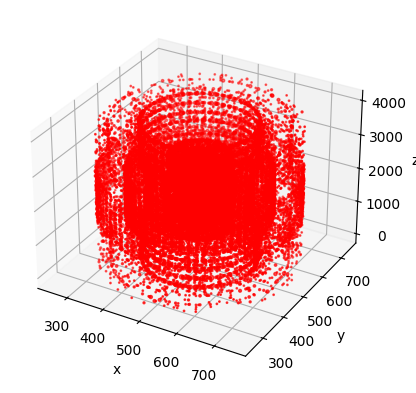

In [10]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for ihit in tqdm(event_bh.dataset):
    voxel_grid.add_hit_to_grid(ihit[DATASET_X_IDX], ihit[DATASET_Y_IDX], ihit[DATASET_Z_IDX])

voxel_grid.show(ax)

In [11]:
# check how many entries of the voxel grid are higher than 0, 1, 2, 3
print('Number of voxels with 0 hits: ', np.sum(voxel_grid.voxel_grid == 0))
print('Number of voxels with 1 hit: ', np.sum(voxel_grid.voxel_grid == 1))
print('Number of voxels with 2 hits: ', np.sum(voxel_grid.voxel_grid == 2))
print('Number of voxels with 3 hits: ', np.sum(voxel_grid.voxel_grid == 3))

Number of voxels with 0 hits:  3999968815
Number of voxels with 1 hit:  13931
Number of voxels with 2 hits:  6954
Number of voxels with 3 hits:  3564


# Detector geometry in a voxel grid: cylindrical coordinates

In [9]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tqdm.notebook import tqdm

import sys
sys.path.append('/Users/glucia/Projects/DeepLearning/TrackingML')
from core.geometry import DetectorModule, VoxelGrid, VoxelGridCylindrical
from core.data_handler import BinaryHandler

In [10]:
detector_file = '../../data/detectors.csv'
voxel_grid_cyl = VoxelGridCylindrical(detector_file, 500, 1000, 4000, 2)


Creating submodule dataset...
Calculating normalized positions...
Calculating bounding box...


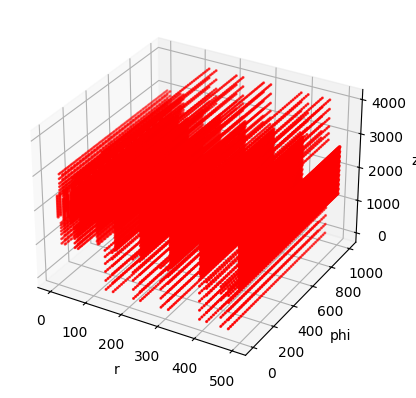

In [11]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

rs = voxel_grid_cyl.submodule_dataset['cr']
phis = voxel_grid_cyl.submodule_dataset['cphi']
zs = voxel_grid_cyl.submodule_dataset['cz']

voxel_grid_cyl.add_dataset_to_grid(rs, phis, zs)
voxel_grid_cyl.show(ax)

In [12]:
# check how many entries of the voxel grid are higher than 0, 1, 2, 3
print('Number of voxels with 0 hits: ', np.sum(voxel_grid_cyl.voxel_grid == 0))
print('Number of voxels with 1 hit: ', np.sum(voxel_grid_cyl.voxel_grid == 1))
print('Number of voxels with 2 hits: ', np.sum(voxel_grid_cyl.voxel_grid == 2))
print('Number of voxels with 3 hits: ', np.sum(voxel_grid_cyl.voxel_grid == 3))

Number of voxels with 0 hits:  1999953088
Number of voxels with 1 hit:  18912
Number of voxels with 2 hits:  28000
Number of voxels with 3 hits:  0
